In [75]:
import cv2,os


data_path=r'C:\DLNN\Day5\PetImages'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict={} #empty dictionary

for i in range(len(categories)):
    label_dict[categories[i]]=labels[i]

print(categories)
print(labels)
print(label_dict)

['Cat', 'Dog', 'new']
[0, 1, 2]
{'Cat': 0, 'Dog': 1, 'new': 2}


In [76]:
img_size=50

data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        #cv2.imshow('LIVE',img)
        #cv2.waitKey(100)
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            print(img_path)
            
        except Exception as e:
            print(e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

C:\DLNN\Day5\PetImages\Cat\cat.0.jpg
C:\DLNN\Day5\PetImages\Cat\cat.1.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10.jpg
C:\DLNN\Day5\PetImages\Cat\cat.100.jpg
C:\DLNN\Day5\PetImages\Cat\cat.1000.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10000.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10001.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10002.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10003.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10004.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10005.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10006.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10007.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10008.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10009.jpg
C:\DLNN\Day5\PetImages\Cat\cat.1001.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10010.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10011.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10012.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10013.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10014.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10015.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10016.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10017.jpg
C:\DLNN\Day5\PetImages\Cat\cat.

C:\DLNN\Day5\PetImages\Cat\cat.10181.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10182.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10183.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10184.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10185.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10186.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10187.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10188.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10189.jpg
C:\DLNN\Day5\PetImages\Cat\cat.1019.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10190.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10191.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10192.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10193.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10194.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10195.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10196.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10197.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10198.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10199.jpg
C:\DLNN\Day5\PetImages\Cat\cat.102.jpg
C:\DLNN\Day5\PetImages\Cat\cat.1020.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10200.jpg
C:\DLNN\Day5\PetImages\Cat\cat.10201.jpg
C:\DLNN\Day5\PetImag

KeyboardInterrupt: 

### Exception Handling

In the previous code segment, a try and except blocks are included in order to handle any raised exception while reading the images. These exceptions may raised due to few possible reasons

1. Files which are not a images (jpg,jpeg,png etc.)
2. Courrupted files

In [8]:
import numpy as np

data=np.array(data)
target=np.array(target)

In [41]:
print(data.shape,target.shape)
cv2.imshow('live',img[:10])

(25000, 50, 50) (25000,)


1

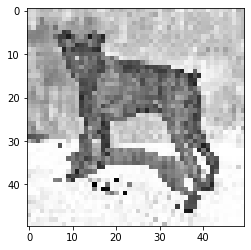

In [43]:
from matplotlib import pyplot as plt

plt.imshow(data[24901],cmap='gray')

target[24901]

Checking the size of the dataset, without few corrupted images the size shoulde be around 24950, the original dataset size was 25000.

Note that the dataset has 24946 rows and 2 columns. The first and second columns contain the resized image and the categorical label respectively. Above code segment split the dataset into data(images) and target(categorical labels)

In [11]:
data_new=data/255.0
data_new=np.reshape(data_new,(data_new.shape[0],img_size,img_size,1))

from keras.utils import np_utils

target_new=np_utils.to_categorical(target)

### data and target preprocessing

The above code segment perform some necessary proprocessing task for data and target

1.```data=np.array(data)/255.0``` - Dividing all the pixels in all the images by 255 in order to convert them to the range 0-1.
This is to reduce the complexity in training the Neural Network.

2.```data=np.reshape(data,(data.shape[0],img_size,img_size,1))``` - The CNNs require 4 dimensional input, therefore we add the  dimension 1, this is to represent grayscale image, for color images you may have to use 3.

3.```new_target=np_utils.to_categorical(target)``` - Converting the labels into categorical representation.

In [ ]:
np.save('data',data_new)
np.save('target',target_new)



saving data and target as numpy array files

In [16]:
target_new.shape

(25000, 2)

1

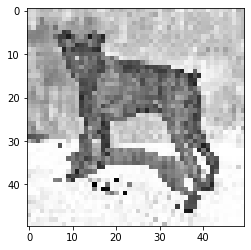